In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit

In [2]:
df = pd.read_csv('AAPL.csv')

In [3]:
data=df.reset_index()[['Close']]

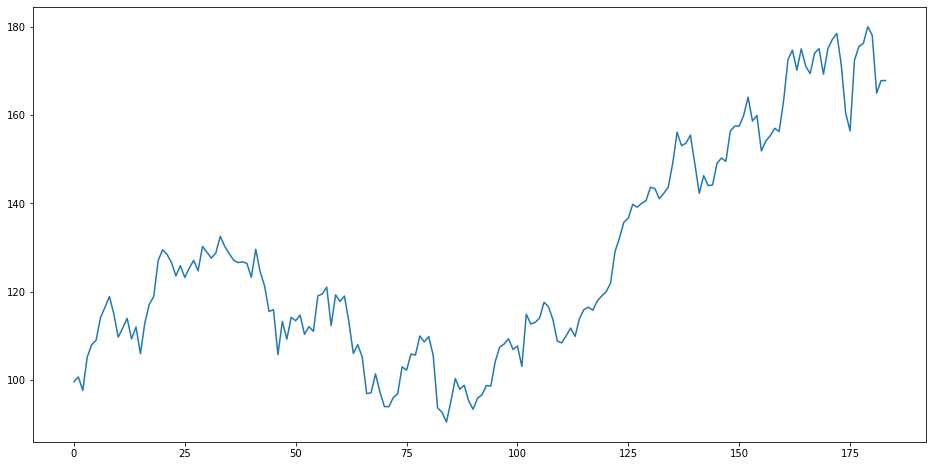

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(data)
plt.show()

In [19]:
data.head()

,Close
0,99.620003
1,100.730003
2,97.669998
3,105.220001
4,108.000000


In [5]:
scalar=MinMaxScaler(feature_range=(0,1))
df1=scalar.fit_transform(np.array(data).reshape(-1,1))

In [6]:
df1

array([[0.10172151],
       [0.11412929],
       [0.079924  ],
       [0.1643193 ],
       [0.19539463],
       [0.20668461],
       [0.26447578],
       [0.29007382],
       [0.31757214],
       [0.27364189],
       [0.21473291],
       [0.23764814],
       [0.2623519 ],
       [0.21026163],
       [0.24021915],
       [0.17292646],
       [0.251062  ],
       [0.2977868 ],
       [0.31757214],
       [0.40867433],
       [0.4357255 ],
       [0.42410027],
       [0.40330876],
       [0.36966241],
       [0.39548408],
       [0.36586188],
       [0.38900071],
       [0.40889785],
       [0.38262915],
       [0.44444447],
       [0.42957747],
       [0.41471056],
       [0.42756548],
       [0.46970709],
       [0.44444447],
       [0.42622398],
       [0.40968032],
       [0.40330876],
       [0.40498551],
       [0.40152029],
       [0.36619721],
       [0.43706683],
       [0.3798346 ],
       [0.34406446],
       [0.27945451],
       [0.28437293],
       [0.17035552],
       [0.254

In [7]:
splits = TimeSeriesSplit(n_splits=5)
for train_index, test_index in splits.split(df1):
    train_data = df1[train_index]
    test_data = df1[test_index]

In [8]:
X_train = []
y_train = []
for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

In [9]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(60, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

In [10]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [11]:
model.fit(X_train, y_train, batch_size=64, epochs=50)

Epoch 1/50
2/2 [==============================] - 5s 69ms/step - loss: 0.1517
Epoch 2/50
2/2 [==============================] - 0s 65ms/step - loss: 0.0924
Epoch 3/50
2/2 [==============================] - 0s 67ms/step - loss: 0.0441
Epoch 4/50
2/2 [==============================] - 0s 62ms/step - loss: 0.0376
Epoch 5/50
2/2 [==============================] - 0s 71ms/step - loss: 0.0423
Epoch 6/50
2/2 [==============================] - 0s 63ms/step - loss: 0.0252
Epoch 7/50
2/2 [==============================] - 0s 71ms/step - loss: 0.0214
Epoch 8/50
2/2 [==============================] - 0s 52ms/step - loss: 0.0279
Epoch 9/50
2/2 [==============================] - 0s 67ms/step - loss: 0.0262
Epoch 10/50
2/2 [==============================] - 0s 69ms/step - loss: 0.0215
Epoch 11/50
2/2 [==============================] - 0s 64ms/step - loss: 0.0187
Epoch 12/50
2/2 [==============================] - 0s 70ms/step - loss: 0.0176
Epoch 13/50
2/2 [==============================] - 0s 66ms/st

In [12]:
test_data = df1[len(df1)-len(test_data)-60:]
X_test = []
y_test = df1[len(df1)-len(test_data):, :]
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [13]:
predictions = model.predict(X_test)
predictions = scalar.inverse_transform(predictions)
y_test = scalar.inverse_transform(y_test)

1/1 [==============================] - 1s 1s/step


In [14]:
y_test_reshaped = y_test[:30] # reshape y_test to have same shape as predictions
rmse = np.sqrt(np.mean(((predictions - y_test_reshaped) ** 2)))
print('RMSE:', rmse)


RMSE: 41.76652007962649


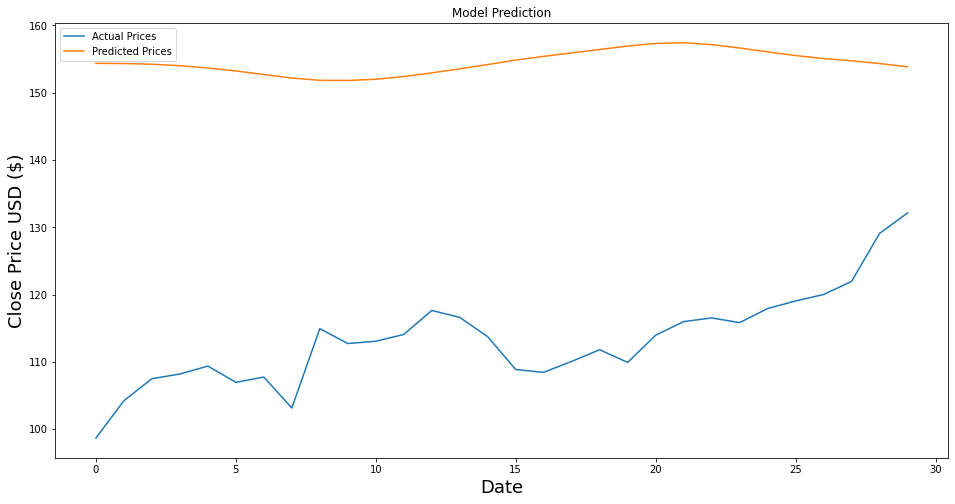

In [15]:
# Plot the predictions and actual prices
plt.figure(figsize=(16,8))
plt.title('Model Prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(y_test_reshaped, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.legend()
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11412\257060278.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


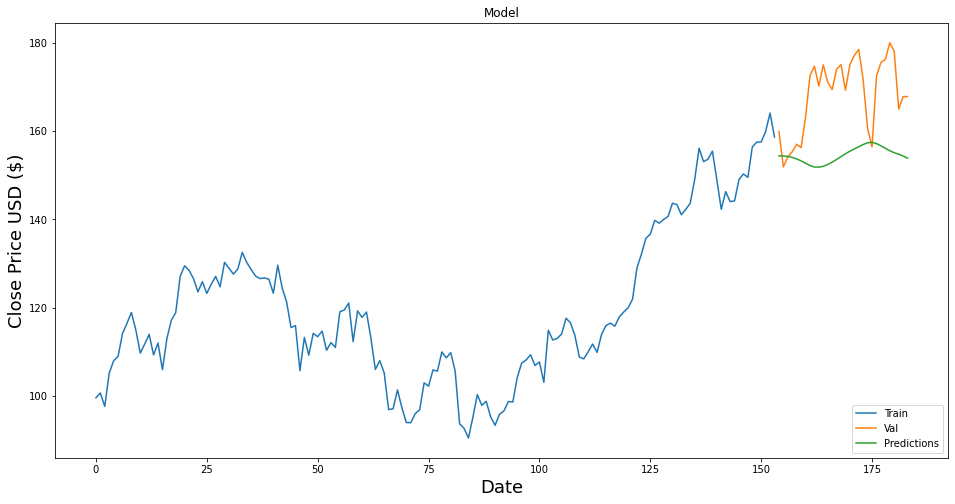

In [18]:
train = data[:len(train_data)]
valid = data[len(train_data):]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()